<a href="https://colab.research.google.com/github/caiogomide/imersao-dados-2021/blob/main/notebooks/aula-3/aula_3_conteudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3. Aula 03 - Correlações, causalidade e relações entre genes**

#### 3.1 Importação de Biblioteca e Base de Dados

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Configuração do seaborn
sns.set()

In [21]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

In [22]:
dados = pd.read_csv(url_dados, compression='zip')
# Renomeação das colunas de expressões gênicas e viabilidade celular, retirando os hifens
dados.columns = dados.columns.str.replace('-','')

#### 3.2 Tabela de Frequências Entre Categorias Distintas

In [43]:
# Criação de tabela que divide cada dose e o tempo aplicado desta dose em cada tipo de tratamento (valores absolutos)
tabela_freq_tempo_doses_tratamento = pd.crosstab(index=[dados['dose'], dados['tempo']], columns=dados['tratamento'])
tabela_freq_tempo_doses_tratamento

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [44]:
# Criação de tabela que divide cada dose e o tempo aplicado desta dose em cada tipo de tratamento (valores relativos)
tabela_freq_proporcional_tempo_doses_tratamento = pd.crosstab(index=[dados['dose'], dados['tempo']], columns=dados['tratamento'], normalize='index') 
tabela_freq_proporcional_tempo_doses_tratamento

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

**Conclusão:** há uma proporção notável entre a quantidade de tratamentos feitos com drogas e tratamentos feitos com controle, em média ~92% dos experimentos foram feitos com droga e ~7% foram feitos com controle, esta
proporção observada para todas doses e tempos pesquisados.


In [42]:
# Criação de tabela que divide cada dose e o tempo aplicado desta dose em cada tipo de tratamento e mostra 
# a média da variação da distribuição gênica do gene zero para cada caso apresentado
tabela_freq_tempo_doses_tratamento_g_zero = pd.crosstab(index=[dados['dose'], dados['tempo']], columns=dados['tratamento'], values=dados['g0'], aggfunc='mean')
tabela_freq_tempo_doses_tratamento_g_zero

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

**Conclusão:** A média da distribuição da variação gênica, como esperada, foi maior nos casos com droga do que com controle.É possivel observar que o ponto máximo de variação gênica do g0 utilizando a dose D1 ocorre 48 horas após o experimento, com a dose D2 ocorre 72 horas após o experimento, também é importante notar que a dose D1 apresentou um grau muito maior de variação gênica em todos horários, comparados a dose D2.

#### 3.3 Conhecendo o Scatter Plot e Lmplot


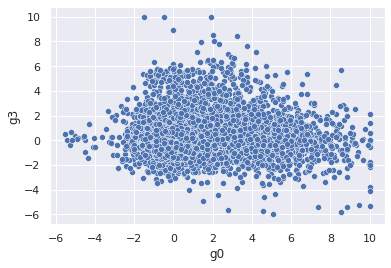

In [27]:
# Gráfico de dispersão que mostra a relação entre a variação do g0 e do g3
relacao_g_zero_g_tres = sns.scatterplot(x='g0', y='g3', data=dados)

**Conclusão:** é possível observar que não há uma correlação entre a variação gênica g0 e g3.

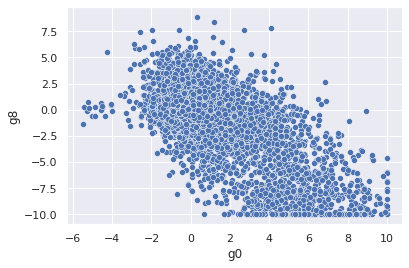

In [28]:
# Gráfico de dispersão que mostra a relação entre a variação do g0 e do g8
relacao_g_zero_g_oito = sns.scatterplot(x='g0', y='g8', data=dados)

**Conclusão:** é possível observar que há uma correlação entre os valores de g0 e g8, quanto maior a variação gênica do g0 menor a do g8, vale lembrar que isto não significa que há uma relação de causa e consequência entre as duas, apenas uma correlação, para tirar mais conclusões seria necessário estudos mais aprofundados.

*Adição de uma linha de tendência para evidenciar o comportamento observado.*

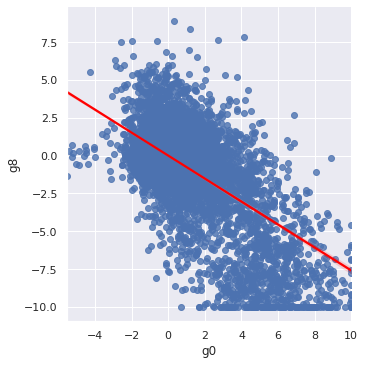

In [29]:
# Gráfico de dispersão que mostra a relação entre a variação do g0 e do g8 com linha de tendência
relacao_g_zero_g_oito_linha = sns.lmplot(x='g0', y='g8', data=dados, line_kws={'color':'red'})

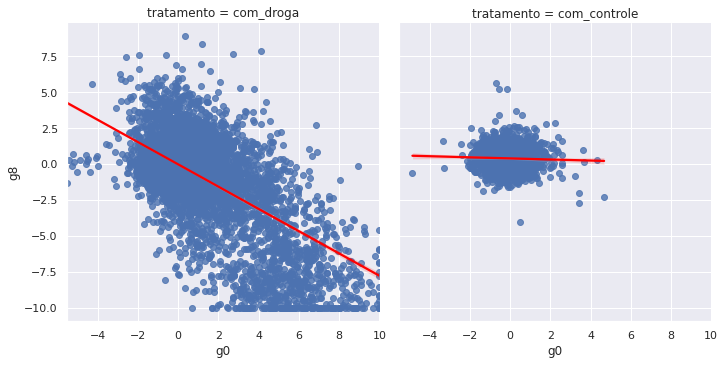

In [30]:
# Gráfico de dispersão que mostra a relação entre a variação do g0 e do g8 em relação ao tipo de tratamento dado
relacao_g_zero_g_oito_linha_tratamento = sns.lmplot(x='g0', y='g8', data=dados, line_kws={'color':'red'}, col='tratamento')

**Conclusão:** Como esperado, o tratamento com controle não apresenta grande variações gênicas.

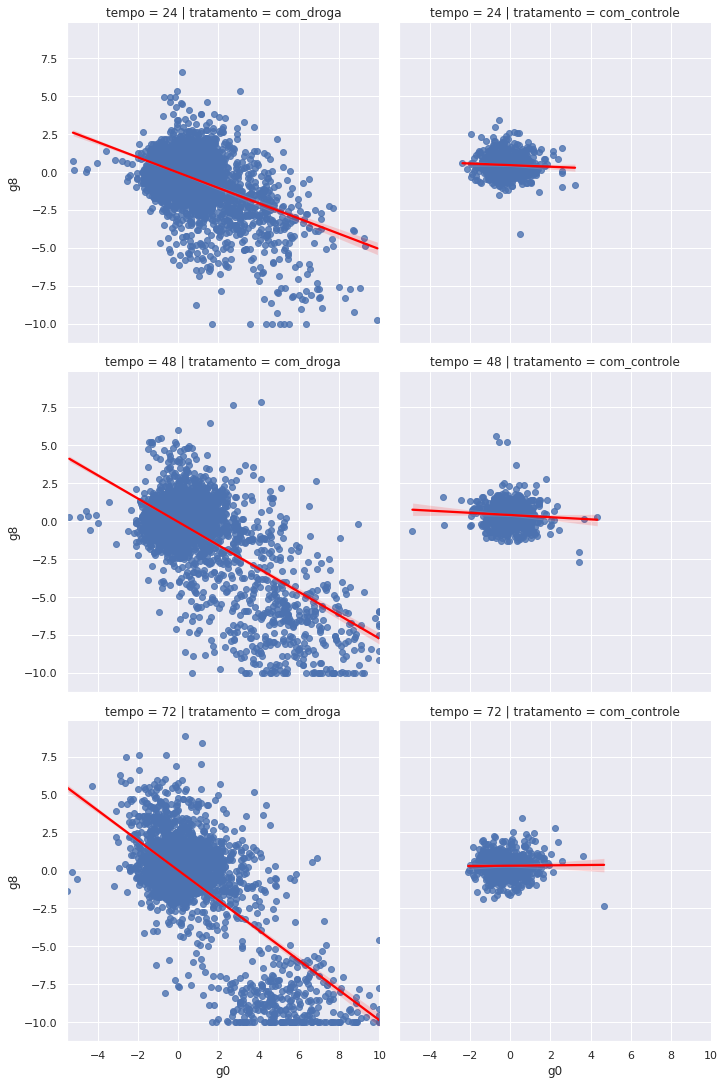

In [31]:
# Gráfico de dispersão que mostra a relação entre a variação do g0 e do g8 em relação ao tipo de tratamento dado
# e ao tempo que o composto foi exposto
relacao_g_zero_g_oito_linha_tratamento_tempo = sns.lmplot(x='g0', y='g8', data=dados, line_kws={'color':'red'}, col='tratamento', row='tempo')

**Conclusão**: Ao se comparar os três periodos de tempo é possível observar que quanto maior o tempo em que o experimento aconteceu há um maior aumento da variação gênica de g0, a qual é inversamente proporcional a variação gênica de g8.

#### 3.4 Correlações

In [32]:
# Seleção de dados dos genes g0 até o g50
correlacao_genes = dados.loc[:,'g0':'g50'].corr()

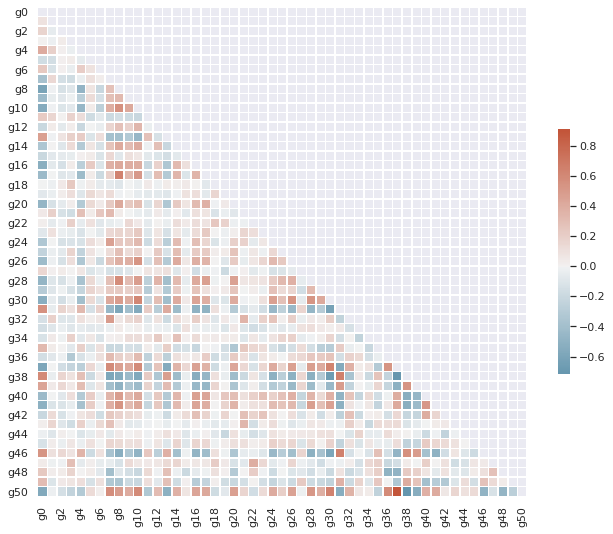

In [33]:
# Geração de máscara para o triângulo de cima
mask = np.triu(np.ones_like(correlacao_genes, dtype=bool))
# Configuração da figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))
# Geração de um mapa de cor divergente customizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Desenha o mapa de calor com a máscara e o tamanho corretos
sns.heatmap(correlacao_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Conclusão:** é possível observar que a maior parte das variações gênicas são pouco correlacionadas, isto propõe que elas não são dependentes entre si, para concluir isto com mais acurácia seria necessário mais estudos aprofundados sobre os experimentos.

In [34]:
# Seleção de dados de variabilidade celular de c0 até c99
correlacao_celular = dados.loc[:,'c0':'c99'].corr()

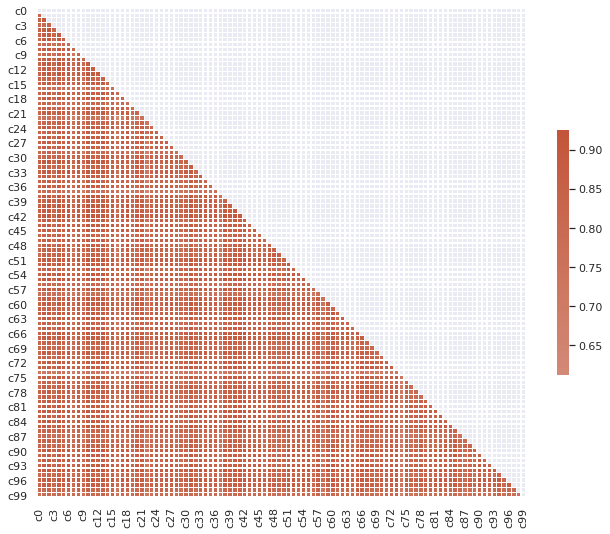

In [45]:
# Geração de máscara para o triângulo de cima
mask = np.triu(np.ones_like(correlacao_celular, dtype=bool))
# Configuração da figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))
# Geração de um mapa de cor divergente customizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Desenha o mapa de calor com a máscara e o tamanho corretos
sns.heatmap(correlacao_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Conclusão:** é possível observar que as viabilidades celulares são extremamente correlacionadas, quando uma célula é afetada por um experimento, é esperado que as outras células sofram essa mesma ação da mesma forma.